Bagging与随机森林之三
===

# 7.比较决策树、Bagging算法和随机森林

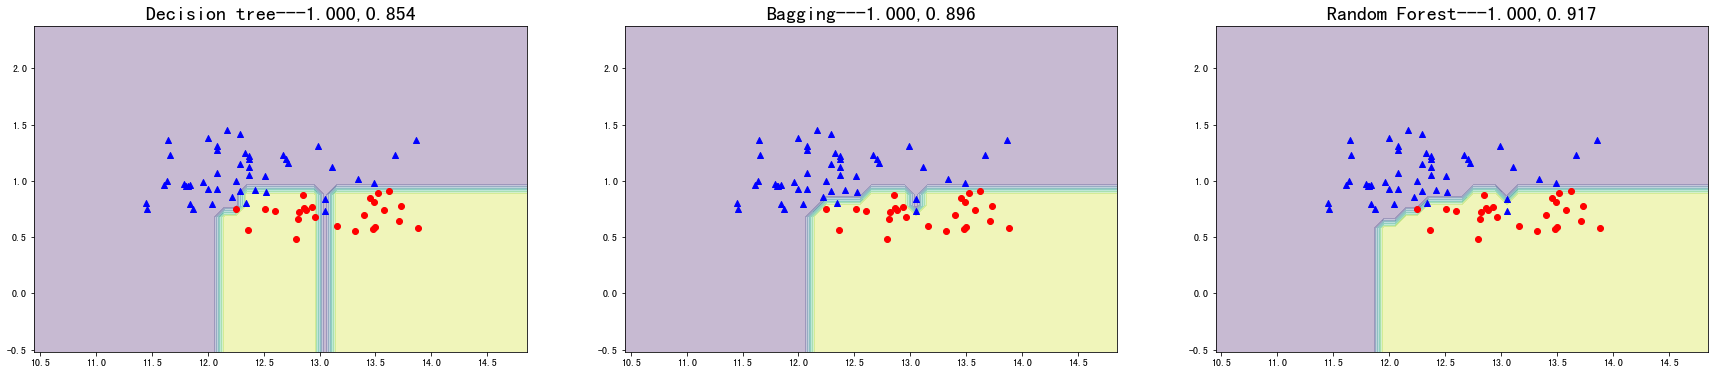

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plt
import os

data_path = os.path.join("data")
df_wine = pd.read_csv(os.path.join(data_path, "wine.data"), header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine = df_wine[df_wine['Class label'] != 1] # 数据集中有3个类别，这里我们只用其中的2个类别
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'Hue']].values # 为了可视化的目的，我们只选择2个特征

le = LabelEncoder()
y = le.fit_transform(y) # 把label转换为0和1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,  random_state=1) # 拆分训练集的40%作为测试集

tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
# 生成500个决策树，详细的参数建议参考官方文档
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)

rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_features='sqrt', max_depth=None, min_samples_split=2, bootstrap=True, n_jobs=1, random_state=1)

# 度量单个决策树的准确性
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

# 度量bagging分类器的准确性
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)

rf = rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rf_train = accuracy_score(y_train, y_train_pred)
rf_test = accuracy_score(y_test, y_test_pred)

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.figure(figsize=(30,6), facecolor='w')
for idx, clf, tt, score in zip([0, 1, 2], [tree, bag, rf], ['Decision tree', 'Bagging', 'Random Forest'],
                               [[tree_train,tree_test],[bag_train,bag_test],[rf_train, rf_test]]):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 3, idx+1)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', marker='^')
    plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', marker='o')
    plt.title('%s---%.3f,%.3f' % (tt, score[0], score[1]),fontsize=20)